In [1]:
# Bibliotecas usadas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Carregando os dados tratados na semana 1
df_telco_customer = pd.read_csv('https://raw.githubusercontent.com/SilvioCSOliveira/ChallengeDataScience2022AluraVoz/main/df_telco_customer_ajustada.csv',sep=';')
df_telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   IdCliente                 7043 non-null   object 
 2   ClienteCancelado          7043 non-null   object 
 3   Genero                    7043 non-null   object 
 4   Maior65                   7043 non-null   object 
 5   Parceiro(a)               7043 non-null   object 
 6   Dependentes               7043 non-null   object 
 7   TempoContrato(m)          7043 non-null   int64  
 8   ServiçoTelefônico         7043 non-null   object 
 9   MultiplasLinhas           7043 non-null   object 
 10  ServicoInternet           7043 non-null   object 
 11  AdicinalSegurancaOnline   7043 non-null   object 
 12  AdicionalBackup           7043 non-null   object 
 13  AdicionalProtDispositivo  7043 non-null   object 
 14  Adiciona

In [3]:
# Analisando 

print("Temos um total de " + str( df_telco_customer['IdCliente'].count()) )
# Temos um total de 7043 clientes da Alura Voz
x = df_telco_customer.query("ClienteCancelado=='Yes'")
print("E deste total " + str(x['IdCliente'].count()) + ' cancelaram sua assinatura.' )


Temos um total de 7043
E deste total 1869 cancelaram sua assinatura.


Agora vou analisar as variáveis qualitativas dos Clientes para tentar encontrar alguma que nos ajude a entender os motivos dos cancelamentos.

Qualitativos:
- Genero                    
- Maior65                   
- Parceiro(a)               
- Dependentes               
- TipoContrato              
- FaturaDigital             
- FormaPagamento            
- ServiçoTelefônico         
	- MultiplasLinhas           
- ServicoInternet           
	- AdicinalSegurancaOnline   
	- AdicionalBackup           
	- AdicionalProtDispositivo  
	- AdicionalSuporte          
- AssinaturaTv              
	- AssinaturaFilmes          

Quantitativos:
- TempoContrato(m)          
- GastoMensal               
- GastoTotal                
- GastoDiarioMedio          



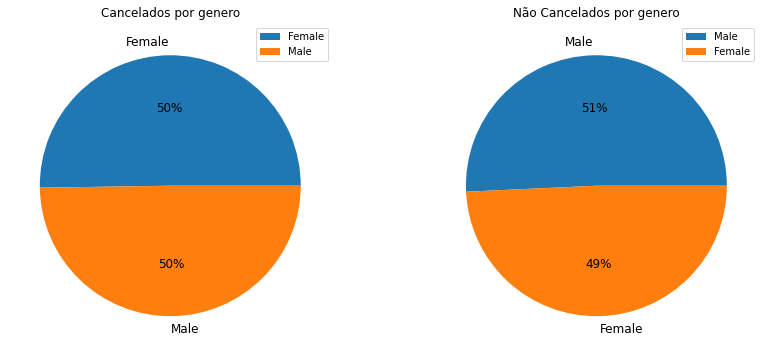

In [4]:
# Analisando os dados Qualitativos, inciando por genero

# Dividir os cancelados e não cancelados em dois dataframes para possibilitar verificar se proporcionalmente há diferença nos dados qualitativos
# entre os Clientes que cancelaram e os que não cancelaram
df_telco_customer_churn = df_telco_customer.query('ClienteCancelado == "Yes"')
df_telco_customer_nao_churn = df_telco_customer.query('ClienteCancelado == "No"')
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Genero"].value_counts().values
labels = df_telco_customer_churn["Genero"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Cancelados por genero')
plt.legend()


count_nc = df_telco_customer_nao_churn["Genero"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Genero"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},)  #,colors =["#6a8ee8", "#424ad1"]
plt.title('Não Cancelados por genero')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação no genero com os cancelamentos.

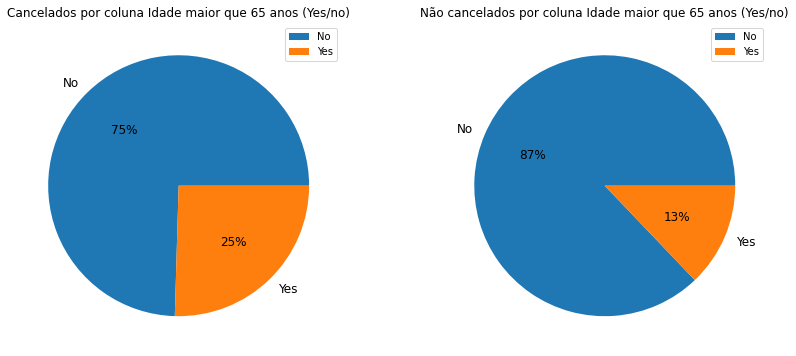

In [5]:
# Analisando os dados Qualitativos coluna Maior65
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Maior65"].value_counts().values
labels = df_telco_customer_churn["Maior65"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por coluna Idade maior que 65 anos (Yes/no)')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não cancelados por coluna Idade maior que 65 anos (Yes/no)')
plt.legend()

Como demonstra o gráfico acima, há um aumento discreto no percentual de Clientes menores que 65 anos e que cancelaram, o que pode indicar uma correlação.

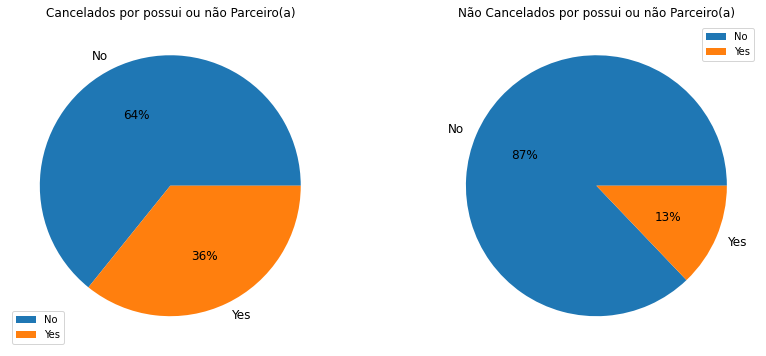

In [6]:
# Analisando os dados Qualitativos, coluna Parceiro(a)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Parceiro(a)"].value_counts().values
labels = df_telco_customer_churn["Parceiro(a)"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Parceiro(a)')
plt.legend()

count_nc = df_telco_customer_nao_churn["Maior65"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Maior65"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Parceiro(a)')
plt.legend()

Como demonstra o gráfico acima, há uma média diferença percentual entre os clientes que possuem parceiro(a) que cancelaram, **o que pode indicar correlação entre o cancelamento e o cliente possuir parceiro(a)**

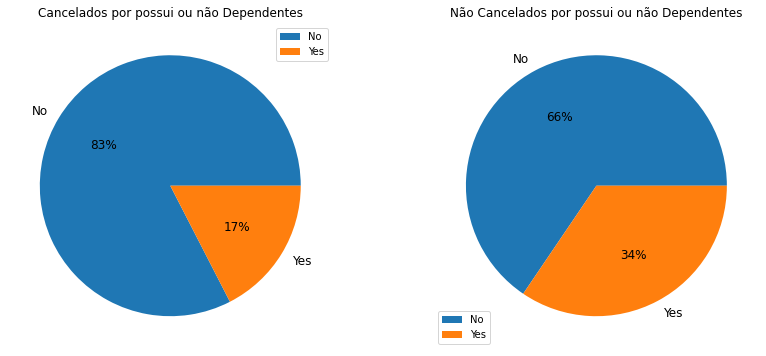

In [7]:
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn["Dependentes"].value_counts().values
labels = df_telco_customer_churn["Dependentes"].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por possui ou não Dependentes')
plt.legend()

count_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().values
labels_nc = df_telco_customer_nao_churn["Dependentes"].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por possui ou não Dependentes')
plt.legend()

Como demonstra o gráfico acima, há uma diferença percentual significativa entre os clientes que possuem dependentes e que cancelaram, **o que pode indicar correlação entre o cancelamento e o cliente possuir dependetes**

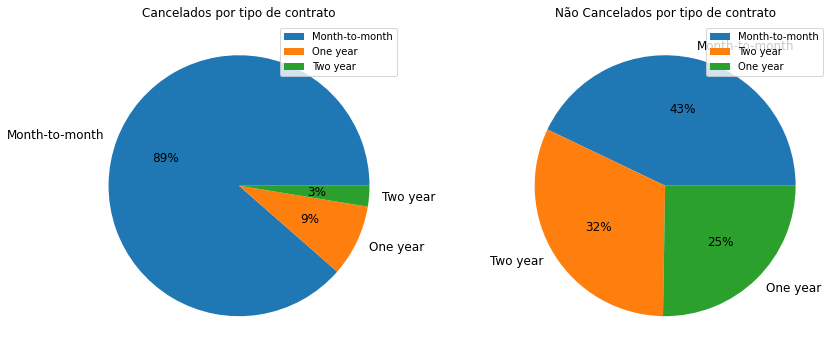

In [8]:
campo = 'TipoContrato'
# Analisando os dados Qualitativos, coluna Dependentes (possui ou não)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por tipo de contrato')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por tipo de contrato')
plt.legend()

Como demonstra o gráfico acima, há uma acentuada diferença percentual entre os clientes realizam o pagamento mês a mês que cancelaram, **o que indica correlação entre o cancelamento e os clientes que fazem pagamento mês a mês**

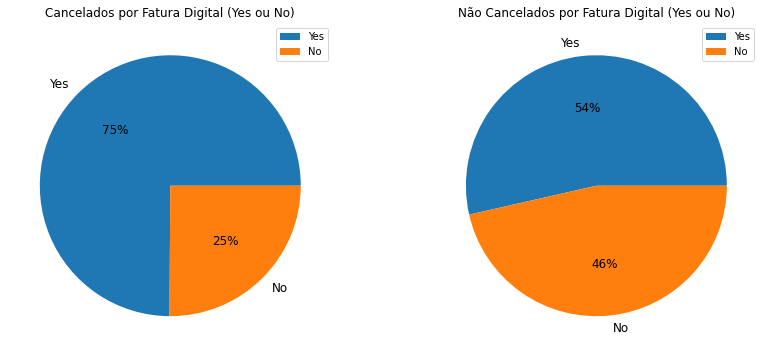

In [9]:
campo = 'FaturaDigital'
# Analisando os dados Qualitativos, coluna Fatura digital (Yes ou No)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Fatura Digital (Yes ou No)')
plt.legend()

incluir explicação discreta correlação

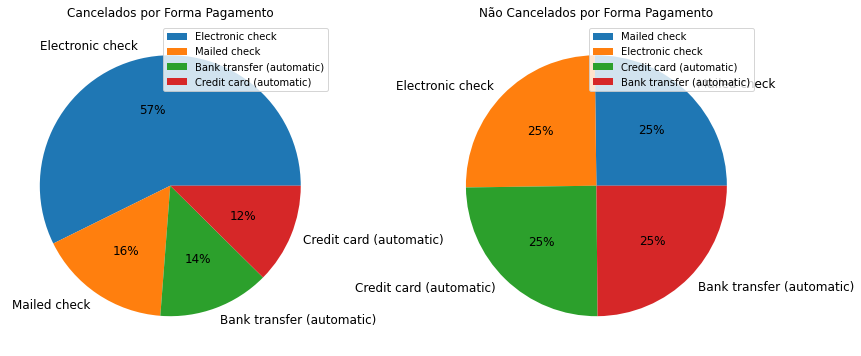

In [10]:
campo = 'FormaPagamento'
# Analisando os dados Qualitativos, coluna Forma Pagamento 
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Forma Pagamento')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Forma Pagamento')
plt.legend()

Explicação correlação média entre pagamento cheque eletronico e cancelamento

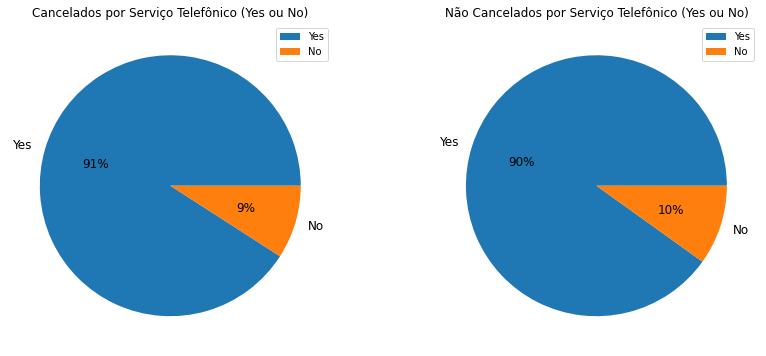

In [11]:
campo = 'ServiçoTelefônico'
# Analisando os dados Qualitativos, coluna Serviço Telefônico (Yes ou no)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Serviço Telefônico (Yes ou No)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Serviço Telefônico (Yes ou No)')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação entre o cancelamento dos Clientes possuirem ou não serviço telefônico.

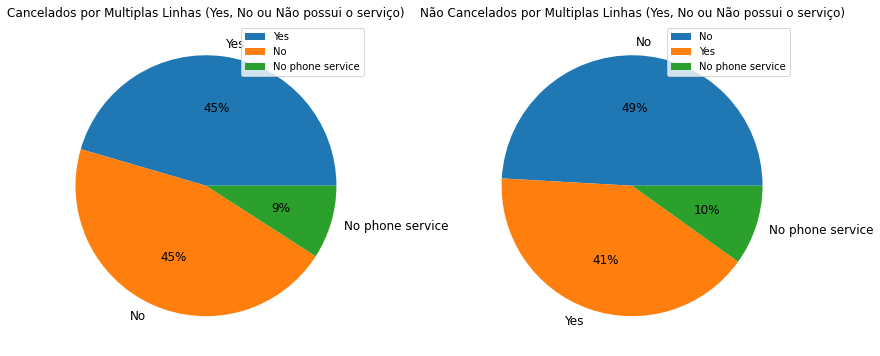

In [12]:
campo = 'MultiplasLinhas'
# Analisando os dados Qualitativos, coluna Multiplas Linhas (Yes, No ou Não possui o serviço))
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Multiplas Linhas (Yes, No ou Não possui o serviço)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Multiplas Linhas (Yes, No ou Não possui o serviço)')
plt.legend()

Como demonstra o gráfico acima, não há nenhuma diferença percentual significativa que indique alguma correlação entre o cancelamento dos Clientes possuirem ou multiplas linhas.

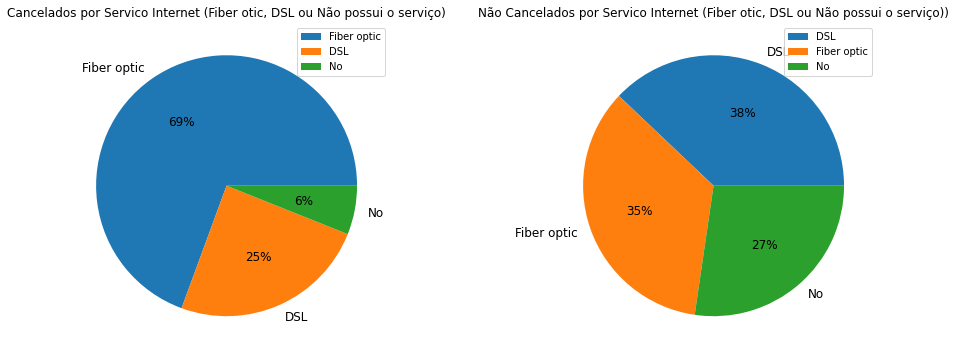

In [13]:
campo = 'ServicoInternet'
# Analisando os dados Qualitativos, coluna Servico Internet (Fiber otic, DSL ou Não possui o serviço))
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Servico Internet (Fiber otic, DSL ou Não possui o serviço)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Servico Internet (Fiber otic, DSL ou Não possui o serviço))')
plt.legend()

Incluir explicação de há correlação cancelamento e clientes com fibra otica 

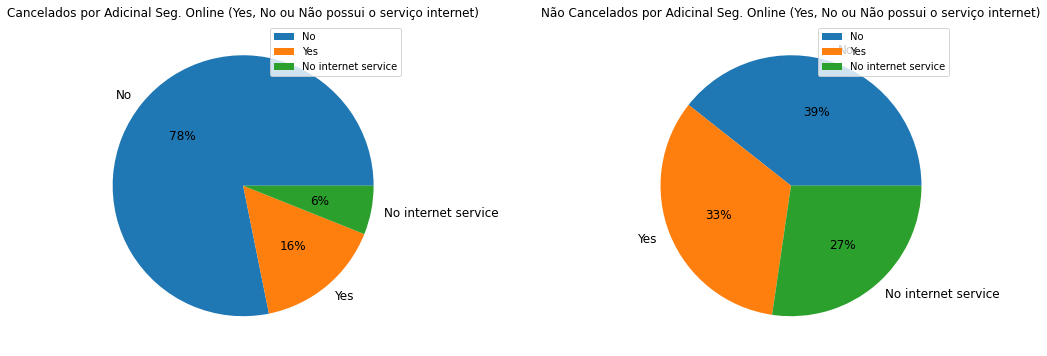

In [14]:
campo = 'AdicinalSegurancaOnline'
# Analisando os dados Qualitativos, coluna Adicinal SegurancaOnline (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Seg. Online (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Seg. Online (Yes, No ou Não possui o serviço internet)')
plt.legend()

Incluir explicação que há correlação cliente não possuir assinatura de serviço e 

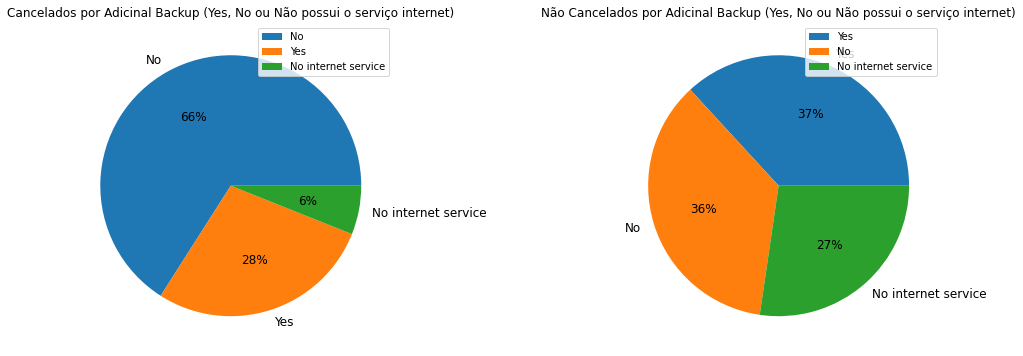

In [15]:
campo = 'AdicionalBackup'
# Analisando os dados Qualitativos, coluna Adicinal Backup (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Backup (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Backup (Yes, No ou Não possui o serviço internet)')
plt.legend()

Incluir explicação de há correlação cancelamento e clientes não possui adicional de backup


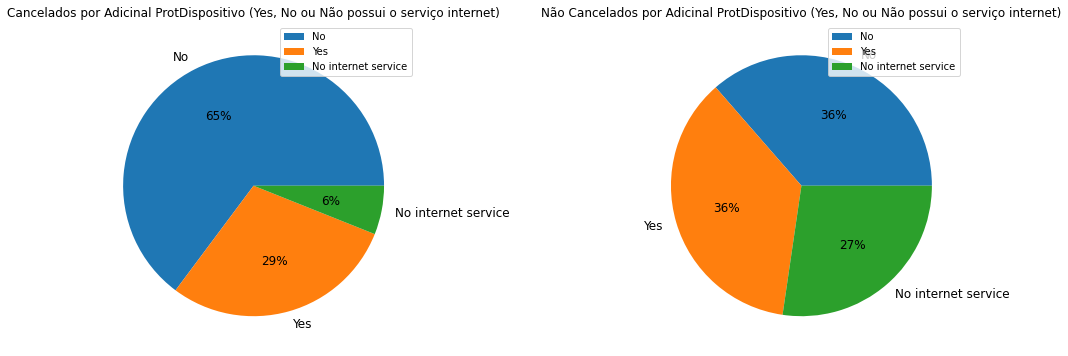

In [16]:
campo = 'AdicionalProtDispositivo'
# Analisando os dados Qualitativos, coluna Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal ProtDispositivo (Yes, No ou Não possui o serviço internet)')
plt.legend()

Incluir explicação de há correlação cancelamento e clientes não possui adicional proteção dispositivo

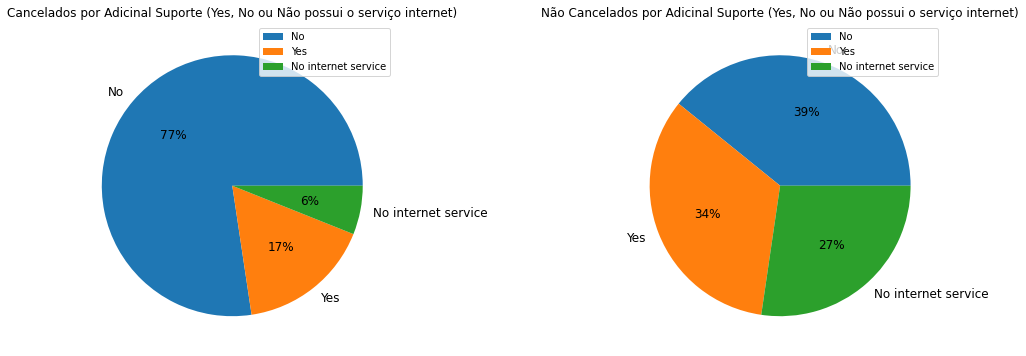

In [17]:
campo = 'AdicionalSuporte'
# Analisando os dados Qualitativos, coluna Adicinal Suporte (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Adicinal Suporte (Yes, No ou Não possui o serviço internet)')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Adicinal Suporte (Yes, No ou Não possui o serviço internet)')
plt.legend()

Incluir explicação de há correlação cancelamento e clientes não possuir adicional suporte. 

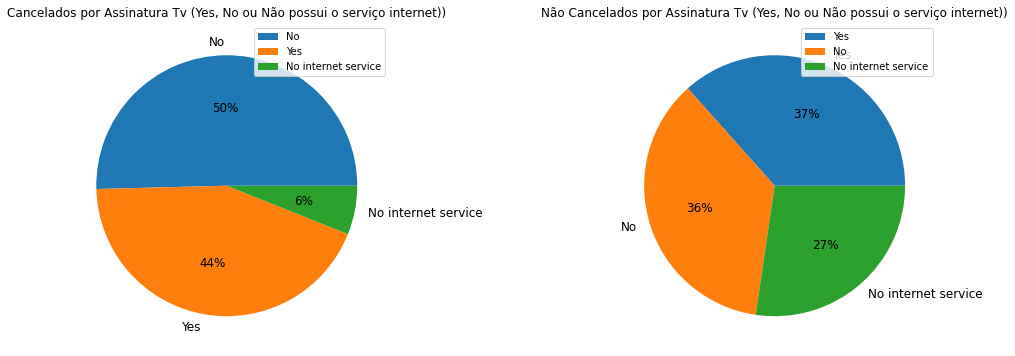

In [18]:
campo = 'AssinaturaTv'
# Analisando os dados Qualitativos, coluna Assinatura Tv (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Assinatura Tv (Yes, No ou Não possui o serviço internet))')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Assinatura Tv (Yes, No ou Não possui o serviço internet))')
plt.legend()

Incluir explicação de não há correlação cancelamento e possuir ou não assinatura TV 

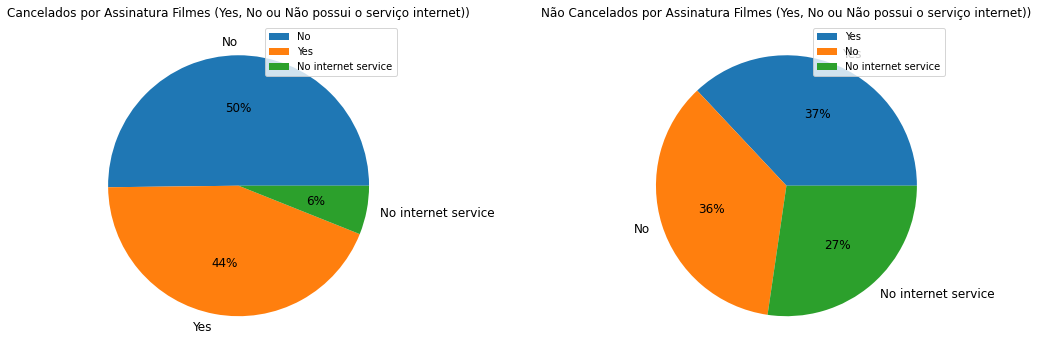

In [20]:
campo = 'AssinaturaFilmes'
# Analisando os dados Qualitativos, coluna Assinatura Filmes (Yes, No ou Não possui o serviço internet))
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
# Usar uma pizza para mostrar a proporção de churn
count = df_telco_customer_churn[campo].value_counts().values
labels = df_telco_customer_churn[campo].value_counts().index
plt.pie(count,labels = list(labels),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Cancelados por Assinatura Filmes (Yes, No ou Não possui o serviço internet))')
plt.legend()

count_nc = df_telco_customer_nao_churn[campo].value_counts().values
labels_nc = df_telco_customer_nao_churn[campo].value_counts().index
plt.subplot(1, 2, 2)
plt.pie(count_nc,labels = list(labels_nc),autopct='%.0f%%' , textprops = {"fontsize": 12},) 
plt.title('Não Cancelados por Assinatura Filmes (Yes, No ou Não possui o serviço internet))')
plt.legend()


Incluir explicação de não há correlação cancelamento e possuir ou não assinatura Filmes

Agora vou analisar as variáveis quantitativas dos Clientes para tentar encontrar alguma que nos ajude a entender os motivos dos cancelamentos:

Quantitativos:
- TempoContrato(m)          
- GastoMensal               
- GastoTotal                
- GastoDiarioMedio 


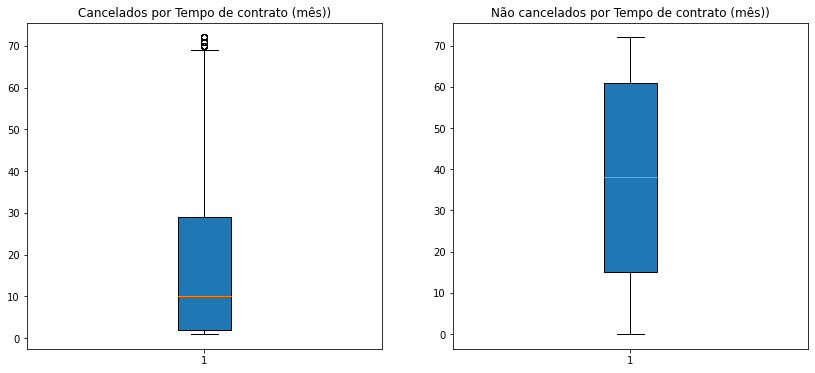

In [21]:
campo = 'TempoContrato(m)'
# Analisando os dados quantitativos, coluna Tempo de contrato em meses)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Tempo de contrato (mês))')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Tempo de contrato (mês))')
plt.show()

Incluir explicação de há correlação négativa do cancelamento com o tempo de Contrato, quanto maior o tempo, menor o cancelamento.

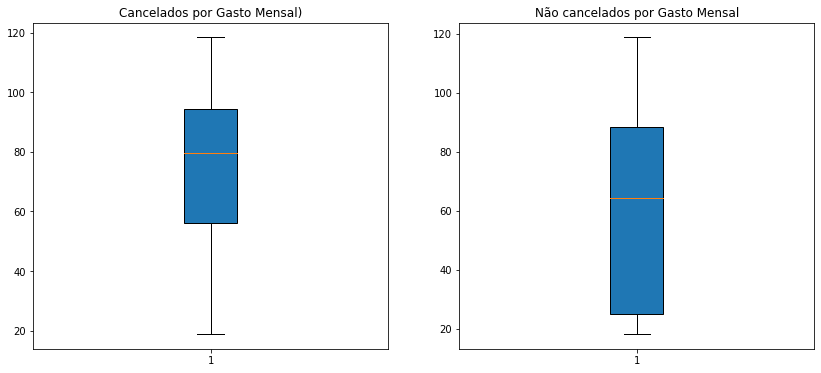

In [22]:
campo = 'GastoMensal'
# Analisando os dados quantitativos, coluna Gasto Mensal)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Mensal)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Mensal')
plt.show()

Explicação que aparentemente não há correlação

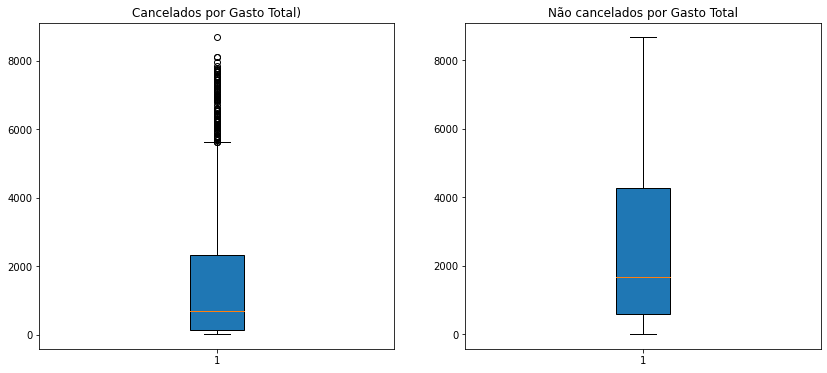

In [23]:
campo = 'GastoTotal'
# Analisando os dados quantitativos, coluna Gasto Total)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Total)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Total')
plt.show()

Incluir explicação de há correlação négativa do cancelamento com o gasto total, quanto maior o gasto total, menor o cancelamento.

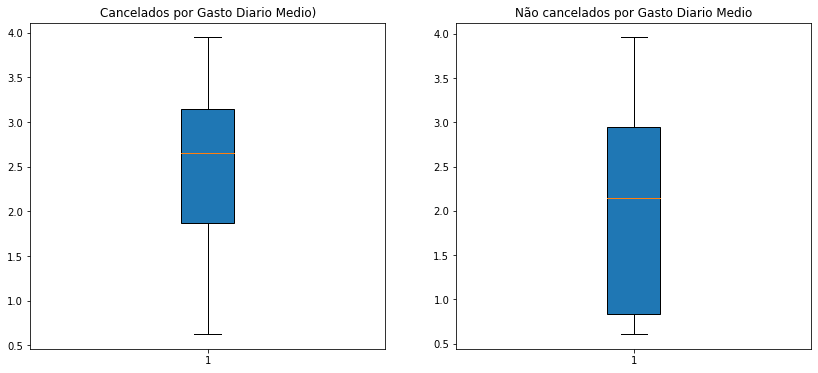

In [24]:
campo = 'GastoDiarioMedio'
# Analisando os dados quantitativos, coluna GastoDiarioMedio)
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_telco_customer_churn[campo],  patch_artist = True )
plt.title('Cancelados por Gasto Diario Medio)')

plt.subplot(1, 2, 2)
plt.boxplot(df_telco_customer_nao_churn[campo],  vert = 1, patch_artist = True) 
plt.title('Não cancelados por Gasto Diario Medio')
plt.show()

Incluir explicação de não há correlação do cancelamento com gasto diário médio


Variáveis que influenciam o cancelamento: 

Qualitativos:
- Genero  - Não influencia                   
- Maior65 Sim para = No                  
- Parceiro(a)  Sim para = yes             
- Dependentes  Sim para = yes             
- TipoContrato Sim para mês a mês             
- FaturaDigital Sim para fátura digital  = yes          
- FormaPagamento Sim para eletronic check           
- ServiçoTelefônico - Não influencia         
	- MultiplasLinhas  - Não influencia         
- ServicoInternet  Sim para = Fibra Otica         
	- AdicinalSegurancaOnline   
	- AdicionalBackup           
	- AdicionalProtDispositivo  
	- AdicionalSuporte
		* Quando o Cliente possui adicionais o cancelamento é menor
- AssinaturaTv - Não influencia             
	- AssinaturaFilmes - Não influencia        

Quantitativos:
- TempoContrato(m) - Quanto mais tempo, menor o cancelamento        
- GastoMensal - Não influencia              
- GastoTotal  - Quanto mais tempo de contrato maior o gasto e  menor o cancelamento              
- GastoDiarioMedio  - Não influencia    